In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import cm
from collections import OrderedDict
import pandas as pd

In [2]:
%matplotlib nbagg

### Plot Figure 5, panel a)

In [3]:
import pickle

In [4]:
with open('../data/data_Fig5a.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    dataMHT = pickle.load(f)

<IPython.core.display.Javascript object>


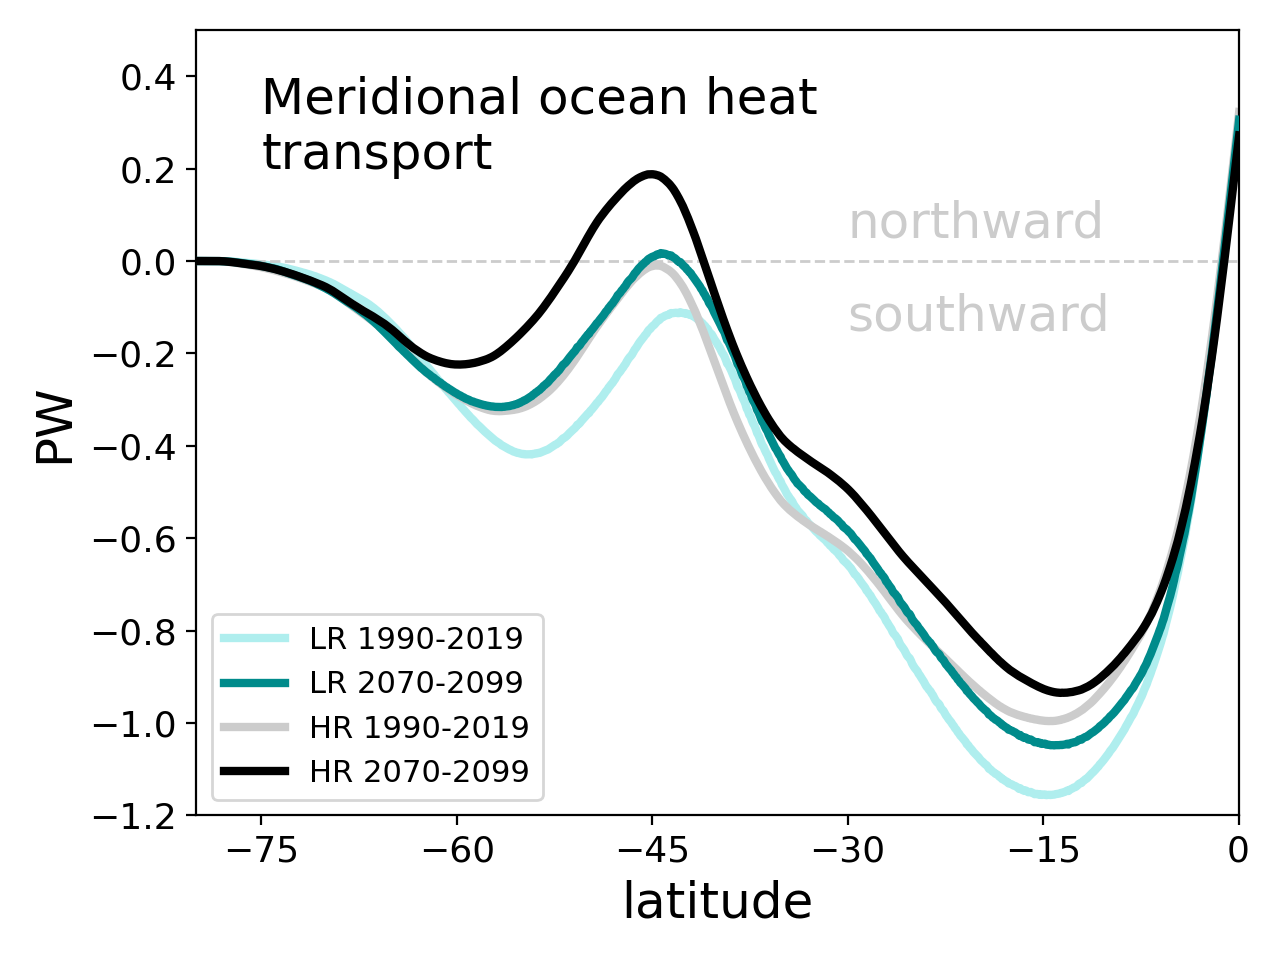

In [5]:
fig3, ax1 = plt.subplots()

fontsize=18
numfontsize=13
lat=dataMHT['lat']

# horizontal line
ax1.plot(lat, np.zeros_like(dataMHT['LR_19902019']), color='0.8', linestyle='--', lw=1)

# LR start 
ax1.plot(lat, dataMHT['LR_19902019'], color='paleturquoise',linewidth=3.,label='LR 1990-2019', zorder=1)
# LR end
ax1.plot(lat, dataMHT['LR_20702099'], color='darkcyan',linewidth=3.,label='LR 2070-2099', zorder=3) 

## HR start
ax1.plot(lat, dataMHT['HR_19902019'], color='0.8',linewidth=3.,label='HR 1990-2019', zorder=2)
## HR end
ax1.plot(lat, dataMHT['HR_20702099'], color='black',linewidth=3.,label='HR 2070-2099', zorder=4)


ax1.set_xlim([-80,0])
plt.xticks([-75,-60,-45,-30,-15,0])
ax1.set_ylim([-1.2,0.5])
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

plt.legend(loc='lower left', fontsize=numfontsize-2)
plt.ylabel('PW', fontsize=fontsize)
plt.xlabel('latitude',fontsize=fontsize)

plt.text(-75, 0.2, 'Meridional ocean heat\ntransport', fontsize=18)
plt.text(-30, 0.05, 'northward', fontsize=18, color='0.8')
plt.text(-30, -0.15, 'southward', fontsize=18, color='0.8')

plt.tight_layout()

In [6]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5a.pdf')
   pp.savefig(fig3,bbox_inches = 'tight')
   pp.close()

### Plot Figure 5, panel d)

#### add CMIP data as an estimate of model uncertainty

In [7]:
ls ../data/CMIP5_OHF*.csv

../data/CMIP5_OHF_ensmeans_allmodels_1990-2019.csv
../data/CMIP5_OHF_ensmeans_allmodels_2070-2099.csv


In [9]:
!head -3 ../data/CMIP5_OHF_ensmeans_allmodels_2070-2099.csv

In [10]:
# load the data, delimiter is semicolon
CMIP5_OHF_ensmeans_end = pd.read_csv("../data/CMIP5_OHF_ensmeans_allmodels_2070-2099.csv", delimiter=';', decimal=",")
CMIP5_OHF_ensmeans_sta = pd.read_csv("../data/CMIP5_OHF_ensmeans_allmodels_1990-2019.csv", delimiter=';', decimal=",")

In [11]:
# the title
CMIP5_OHF_ensmeans_end.columns.values

array(['Latitude', 'ACCESS1-0', 'CMCC-CESM', 'CMCC-CM', 'CNRM-CM5',
       'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-R', 'IPSL-CM5A-LR',
       'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MPI-ESM-LR', 'MPI-ESM-MR',
       'MRI-CGCM3', 'NorESM1-M', 'NorESM1-ME'], dtype=object)

In [12]:
# get rid of the minus character in the variable names
new_header = [s.replace("-", "_") for s in CMIP5_OHF_ensmeans_end.columns.values]
CMIP5_OHF_ensmeans_end.columns = new_header
CMIP5_OHF_ensmeans_sta.columns = new_header

In [13]:
# check the result
CMIP5_OHF_ensmeans_end

,Latitude,ACCESS1_0,CMCC_CESM,CMCC_CM,CNRM_CM5,GFDL_ESM2G,GFDL_ESM2M,GISS_E2_R,IPSL_CM5A_LR,IPSL_CM5A_MR,IPSL_CM5B_LR,MPI_ESM_LR,MPI_ESM_MR,MRI_CGCM3,NorESM1_M,NorESM1_ME
0,-89,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-88,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-87,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-86,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,85,0.007197,0.022935,0.014946,0.006616,0.004781,0.002489,0.005850,0.005177,0.007422,0.005899,0.008510,-0.000061,0.009287,0.013273,0.007257
175,86,0.004560,0.014247,0.009827,0.004435,0.002951,0.001663,0.004062,0.003573,0.006204,0.004292,0.005768,-0.005827,0.007071,0.009706,0.005045
176,87,0.002597,0.008892,0.006789,0.002405,0.001558,0.000959,0.002325,0.002132,0.004865,0.003200,0.003360,-0.013712,0.006942,0.003484,0.002888
177,88,0.001126,0.004367,0.003525,0.000901,0.000647,0.000449,0.001074,0.001778,0.003291,0.001940,0.001623,-0.012880,0.006719,0.000035,-0.000086


In [14]:
allCMIP5=CMIP5_OHF_ensmeans_sta.columns[1:].values
allCMIP5 = [model for model in allCMIP5 if model not in ('GFDL_ESM2G', 'GFDL_ESM2M')] #GFDL is not in Fig.1
allCMIP5

['ACCESS1_0',
 'CMCC_CESM',
 'CMCC_CM',
 'CNRM_CM5',
 'GISS_E2_R',
 'IPSL_CM5A_LR',
 'IPSL_CM5A_MR',
 'IPSL_CM5B_LR',
 'MPI_ESM_LR',
 'MPI_ESM_MR',
 'MRI_CGCM3',
 'NorESM1_M',
 'NorESM1_ME']

<IPython.core.display.Javascript object>


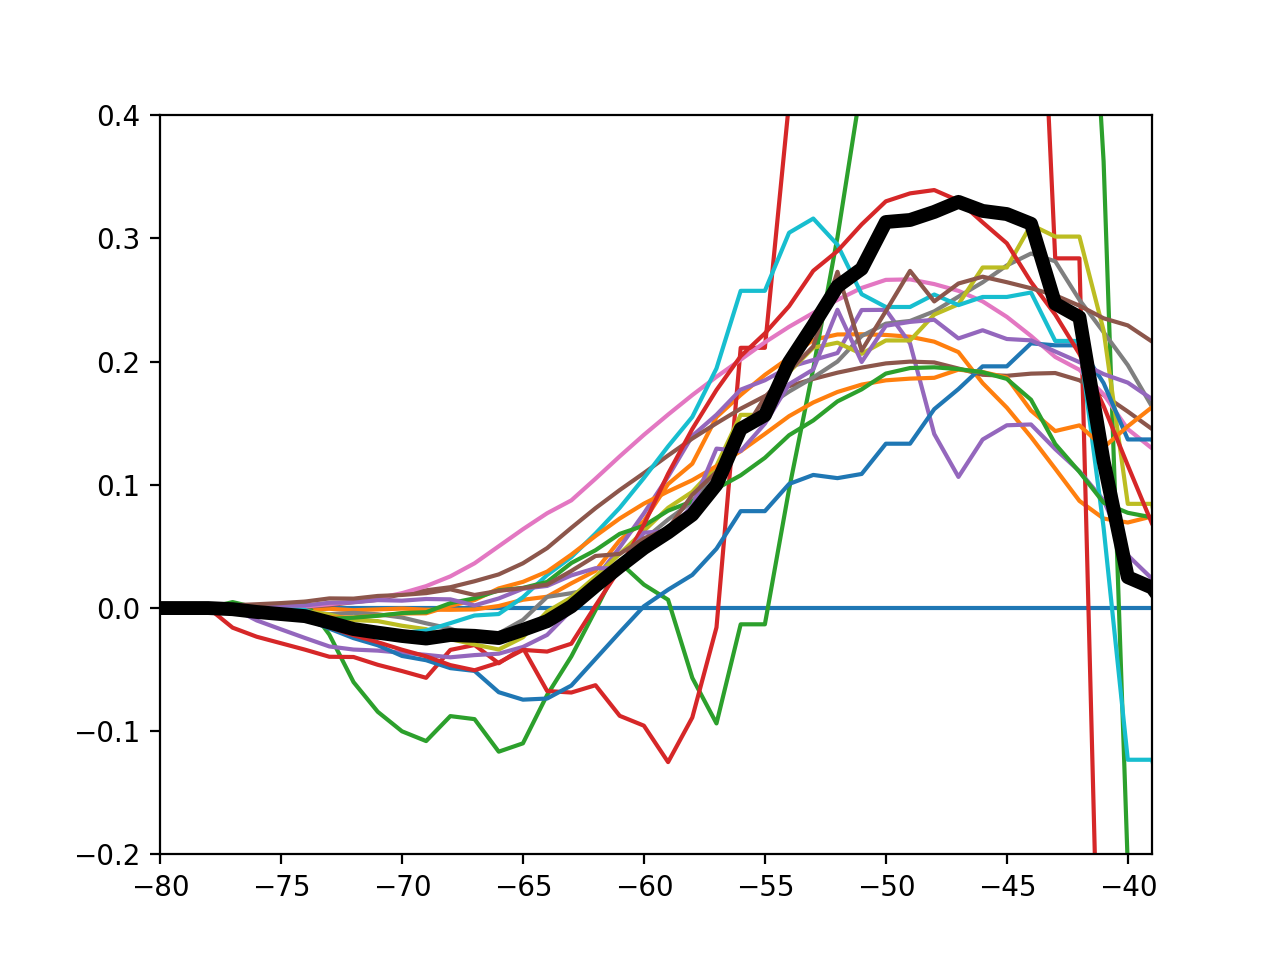

(-0.2, 0.4)

In [15]:
fig, ax = plt.subplots()

diff=CMIP5_OHF_ensmeans_end-CMIP5_OHF_ensmeans_sta
ax.plot(CMIP5_OHF_ensmeans_end.Latitude, diff)
ax.plot(CMIP5_OHF_ensmeans_end.Latitude, diff[allCMIP5].mean(axis=1), lw=5, color='k')

ax.set_xlim([-80,-39])
ax.set_ylim([-0.2,0.4])

In [16]:
CMIP5_OHF_ensmeans_sta[CMIP5_OHF_ensmeans_sta.columns[1:].values].describe()

,ACCESS1_0,CMCC_CESM,CMCC_CM,CNRM_CM5,GFDL_ESM2G,GFDL_ESM2M,GISS_E2_R,IPSL_CM5A_LR,IPSL_CM5A_MR,IPSL_CM5B_LR,MPI_ESM_LR,MPI_ESM_MR,MRI_CGCM3,NorESM1_M,NorESM1_ME
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.279533,1.545572,1.296981,0.229978,0.260681,0.240959,0.313649,0.058954,0.086688,0.003913,0.231918,0.210979,0.383287,0.279697,0.278597
std,0.694493,5.216354,5.385439,0.557758,0.832328,0.810733,0.668253,0.651161,0.689058,0.456519,0.850433,0.823881,0.689545,0.950550,0.951203
min,-0.668925,-13.383309,-12.958109,-1.343161,-0.891269,-0.967840,-0.898362,-1.473846,-1.487154,-1.182626,-1.288340,-1.261585,-0.552658,-0.999990,-1.027819
25%,-0.247480,-0.365480,-0.584321,-0.077519,-0.320947,-0.372184,-0.090972,-0.113950,-0.100005,-0.082321,-0.317020,-0.314327,-0.018760,-0.654038,-0.666141
50%,0.000499,0.055016,0.027658,0.053299,0.000250,0.000253,0.031791,0.002782,0.005612,0.004116,0.000412,0.000000,0.090463,0.003329,0.003560
75%,0.760691,2.821191,2.313440,0.500203,0.584318,0.678283,0.646096,0.386411,0.461596,0.222777,0.796251,0.722050,0.658305,1.118103,1.084735
max,1.644075,24.614008,21.343046,1.600517,2.024081,1.933545,2.220399,1.475321,1.592054,0.932186,1.883589,1.828627,2.101144,2.052698,2.079768


#### Now group the CMIP models by resolution

In [17]:
# From R-script by Helge Goessling
#           model resolution
#1       ACCESS1-0   74.10823
#2         CanESM2  237.02614
#3           CCSM4   65.18629
#4       CMCC-CESM  124.51065
#5         CMCC-CM  124.51065
#6        CMCC-CMS  124.51065
#7        CNRM-CM5   62.69847
#8   CSIRO-Mk3-6-0  157.01115
#9    GISS-E2-H-CC  187.71424
#10      GISS-E2-H  187.71424
#11   GISS-E2-R-CC  187.71424
#12      GISS-E2-R  187.71424
#13     HadGEM2-CC   83.97665
#14     HadGEM2-ES   83.97665
#15   IPSL-CM5A-LR  124.51065
#16   IPSL-CM5A-MR  124.51065
#17   IPSL-CM5B-LR  124.51065
#18         MIROC5   81.41273
#19 MIROC-ESM-CHEM   96.99576
#20      MIROC-ESM   96.99576
#21     MPI-ESM-LR   87.86708
#22     MPI-ESM-MR   35.25105
#23      MRI-CGCM3   59.38829
#24       MRI-ESM1   59.38829
#25     NorESM1-ME   65.18606
#26      NorESM1-M   65.18606
###
#74.1082298391264,237.026140692107,65.1862903093934,124.510649257373,124.510649257373,124.510649257373,62.6984658445876,157.011148275695,187.714243245282,187.714243245282,187.714243245282,187.714243245282,83.9766480735938,83.9766480735938,124.510650561978,124.510650561978,124.510650561978,81.4127344907232,96.9957613179786,96.9957613179786,87.8670818390163,35.2510485315802,59.3882924485275,59.3882924485275,65.1860643824094,65.1860643824094

In [18]:
allCMIP5

['ACCESS1_0',
 'CMCC_CESM',
 'CMCC_CM',
 'CNRM_CM5',
 'GISS_E2_R',
 'IPSL_CM5A_LR',
 'IPSL_CM5A_MR',
 'IPSL_CM5B_LR',
 'MPI_ESM_LR',
 'MPI_ESM_MR',
 'MRI_CGCM3',
 'NorESM1_M',
 'NorESM1_ME']

In [19]:
SOres=np.array([74.10823, 124.51065, 124.51065, 62.69847, 187.71424, 124.51065, 124.51065, 124.51065, 87.86708, 35.25105, 59.38829, 65.18606, 65.18606])
SOres

array([ 74.10823, 124.51065, 124.51065,  62.69847, 187.71424, 124.51065,
       124.51065, 124.51065,  87.86708,  35.25105,  59.38829,  65.18606,
        65.18606])

In [20]:
# The CMIP5 models can be grouped into two sets with ’higher’/’lower’ resolution than 90 km
np.sum(SOres>=90.), np.sum(SOres<90.)

(6, 7)

In [23]:
allCMIP5=np.array(allCMIP5)
allCMIP5[SOres>=90.], allCMIP5[SOres<90.]

(array(['CMCC_CESM', 'CMCC_CM', 'GISS_E2_R', 'IPSL_CM5A_LR',
        'IPSL_CM5A_MR', 'IPSL_CM5B_LR'], dtype='<U12'),
 array(['ACCESS1_0', 'CNRM_CM5', 'MPI_ESM_LR', 'MPI_ESM_MR', 'MRI_CGCM3',
        'NorESM1_M', 'NorESM1_ME'], dtype='<U12'))

In [24]:
with open('../data/data_Fig5d.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    dataMHT = pickle.load(f)

<IPython.core.display.Javascript object>


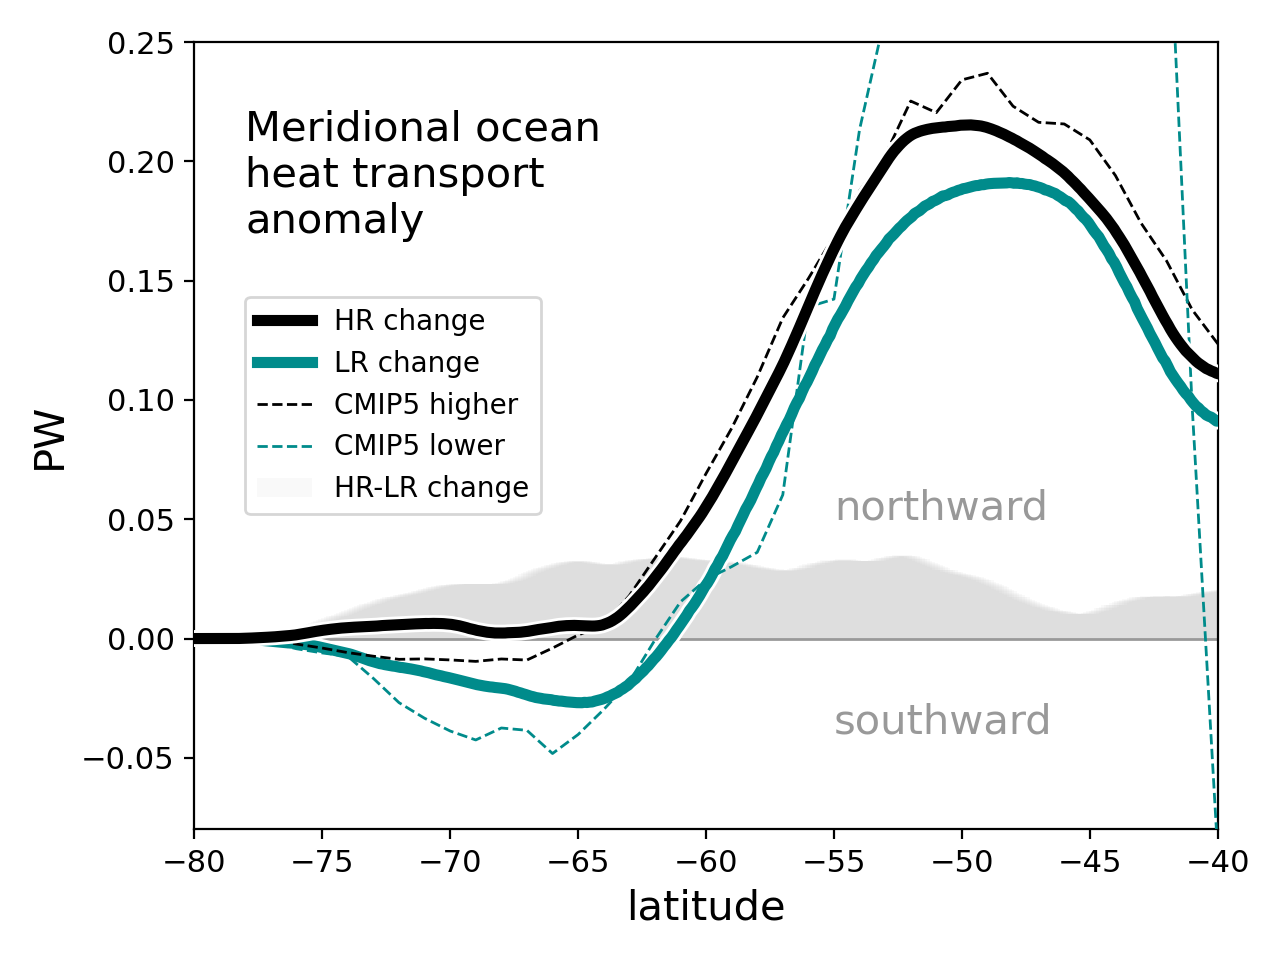

In [25]:
fig2, ax2 = plt.subplots()

fontsize=15
numfontsize=11

# horizontal line
lat=dataMHT['lat']
ax2.plot(lat, np.zeros_like(dataMHT['HRchange']), color='0.6', linestyle='-', lw=1)

# HR scenario-control
ax2.plot(lat, dataMHT['HRchange'], color='white',linewidth=6., zorder=7)
ax2.plot(lat, dataMHT['HRchange'], color='black',linewidth=4.,label='HR change', zorder=8)

## LR scenario-control
ax2.plot(lat, dataMHT['LRchange'], color='white',linewidth=6., zorder=4)
ax2.plot(lat, dataMHT['LRchange'], color='darkcyan',linewidth=4.,label='LR change', zorder=5)

# CMIP5 climate change signal
diff=CMIP5_OHF_ensmeans_end-CMIP5_OHF_ensmeans_sta

# CMIP5 higher res
ax2.plot(CMIP5_OHF_ensmeans_end.Latitude, 
         diff[allCMIP5[SOres<=90.]].mean(axis=1), 
         lw=1, ls='dashed', color='k', label='CMIP5 higher', zorder=6)

# CMIP5 lower
ax2.plot(CMIP5_OHF_ensmeans_end.Latitude, 
         diff[allCMIP5[SOres>90.]].mean(axis=1), 
         lw=1, ls='dashed', color='darkcyan', label='CMIP5 lower', zorder=6)

# diff between HR and LR change
ax2.bar(lat, dataMHT['HRchange'] - dataMHT['LRchange'], color='0.8',linewidth=3.,label='HR-LR change', zorder=-1, alpha=0.1)


ax2.set_xlim([-80,-40])
plt.xticks([-80,-75,-70,-65,-60,-55,-50,-45,-40])
ax2.set_ylim([-0.08,0.25])
# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

plt.legend(loc=(0.05,0.4)) #'center left'
plt.ylabel('PW', fontsize=fontsize)
plt.xlabel('latitude',fontsize=fontsize)

plt.text(-78, 0.17, 'Meridional ocean\nheat transport\nanomaly', fontsize=fontsize)
plt.text(-55, 0.05, 'northward', fontsize=fontsize, color='0.6')
plt.text(-55, -0.04, 'southward', fontsize=fontsize, color='0.6')

plt.tight_layout()

In [26]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5d.pdf')
   pp.savefig(fig2,bbox_inches = 'tight')
   pp.close()